In [112]:
%load_ext autoreload
%autoreload 2

import os
import random
import sys

sys.path.append("../")

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from src.utils import DEFAULT_RANDOM_STATE, set_random_state

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
set_random_state(state=DEFAULT_RANDOM_STATE)
seaborn.set_theme()

class Paths:
    data_dir = "../data/src/"
    submit_dir  = "../data/submissions/"
    
paths = Paths()

regenerate = True
mode = "train"  # "train" (only train dataset), "sub" (no y_test)

In [8]:
drivers = pd.read_csv(paths.data_dir + "driver_info.csv")
drivers

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
0,27,9.0,865,19.0,l17437965W,1,2019-4-2
1,46,7.9,2116,11.0,Z12362316j,0,2021-11-19
2,59,7.8,947,4.0,g11098715c,0,2021-1-15
3,37,7.0,18,4.0,U12618125q,0,2019-11-20
4,39,8.2,428,7.0,A14375829B,0,2019-7-23
...,...,...,...,...,...,...,...
15148,19,7.9,52,12.0,R13807707w,1,2019-12-1
15149,40,7.6,1142,3.0,F86199947G,0,2019-1-18
15150,27,7.9,1280,3.0,O10119419p,1,2018-9-16
15151,30,7.9,31,5.0,B35483077Y,0,2019-11-23


In [129]:
import pandas as pd
rides_info = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv")
cars = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv")
driver_info = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv")
 
rides_info = rides_info.merge(cars, on="car_id", how="right")
rides_info = rides_info.merge(driver_info, on="user_id", how="left")

In [130]:
rides_info

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,...,riders,year_to_work,target_reg,target_class,age,user_rating,user_rides,user_time_accident,sex,first_ride_date
0,n14703870u,y13744087j,Q1Z,2020-01-01,5.72,220,3514,42,NaN,6,...,76163,2021,108.53,another_bug,38,7.4,268,2.0,0,2019-9-7
1,W18144322F,y13744087j,M1P,2020-01-01,2.52,37392,523483,45,53.000000,2,...,76163,2021,108.53,another_bug,46,6.7,643,3.0,0,2020-7-28
2,Q11878237R,y13744087j,D1j,2020-01-02,7.17,45,444,54,82.000000,0,...,76163,2021,108.53,another_bug,49,8.4,161,NaN,0,2020-3-23
3,r92216797N,y13744087j,s1D,2020-01-02,6.19,10,105,35,40.000000,0,...,76163,2021,108.53,another_bug,37,8.3,1548,NaN,1,2018-7-7
4,s16802374w,y13744087j,d1v,2020-01-03,3.14,49,486,54,85.845615,1,...,76163,2021,108.53,another_bug,22,9.0,36,15.0,1,2019-11-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406633,e58324335h,z-1337463D,T1c,2020-03-30,5.08,46,408,49,87.000000,0,...,92312,2016,54.68,engine_check,38,8.4,969,9.0,0,2021-1-20
406634,P21838441I,z-1337463D,B1g,2020-03-31,5.27,43,553,85,90.429573,0,...,92312,2016,54.68,engine_check,28,8.4,1070,NaN,1,2018-11-11
406635,D22372203c,z-1337463D,q1t,2020-03-31,6.03,6,54,40,66.000000,2,...,92312,2016,54.68,engine_check,30,8.5,190,23.0,1,2020-4-3
406636,l11688888v,z-1337463D,b1B,2020-04-01,2.89,46,455,40,113.000000,0,...,92312,2016,54.68,engine_check,28,8.0,672,4.0,0,2019-5-20


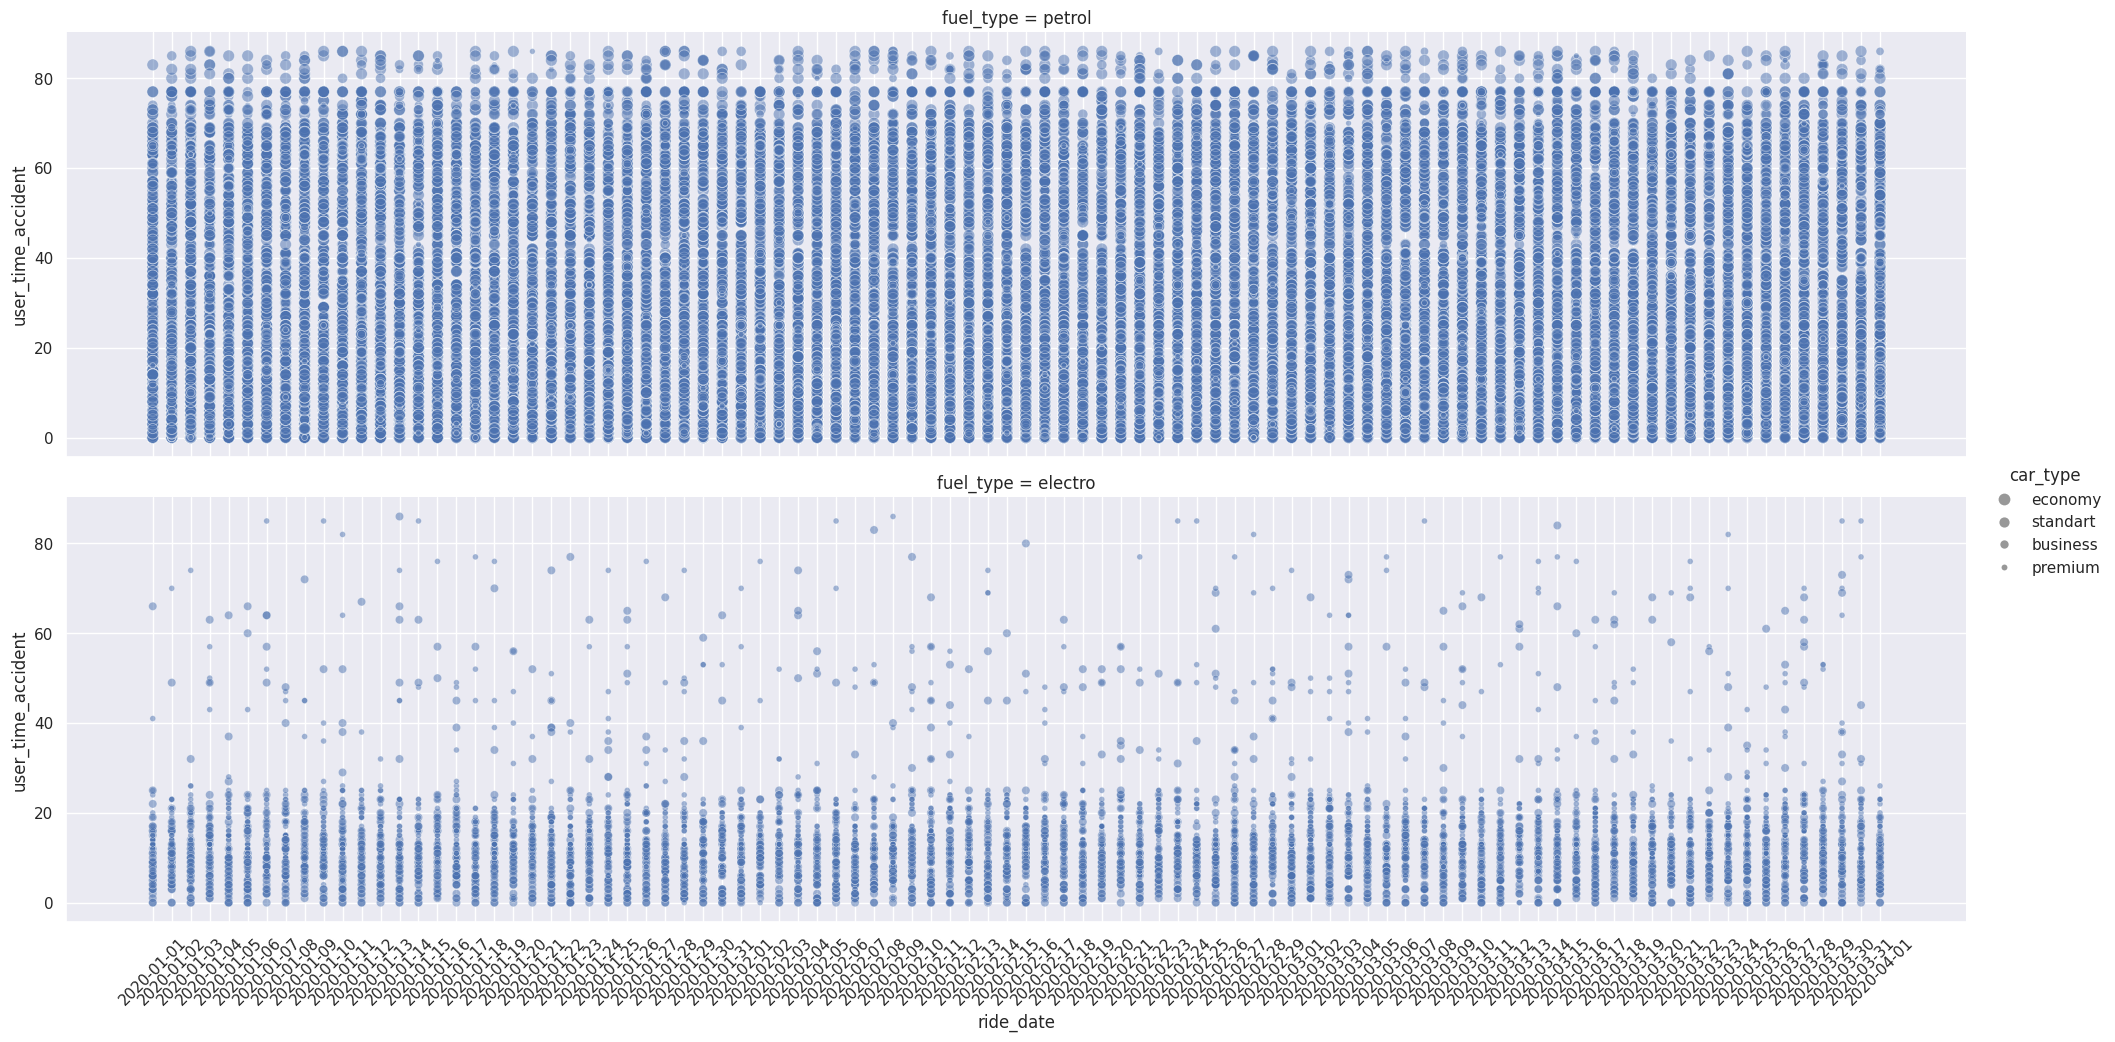

In [131]:
params = {'data' : rides_info,
          'kind' : 'scatter',
          'x' : 'ride_date',
          'y' : 'user_time_accident',
          'row' : 'fuel_type',
          'size' : 'car_type',
          'hue' : 'target_class',
          'aspect' : 4, 
          'alpha' : 0.5}
g = sns.relplot(**params)
plt.xticks(rotation=45);